In [4]:
import json
import matplotlib.pyplot as plt


In [11]:
def load_training_data(json_file):
    """Load the training data from the JSON file."""
    with open(json_file, 'r') as f:
        return json.load(f)

def extract_lr_and_loss_data(training_data):
    """Extract learning rate and overall loss data over epochs."""
    epoch_lr_map = {}
    epoch_loss_map = {}

    for entry in training_data:
        epoch = entry['epoch']
        lr = entry.get('lr', None)
        loss_data = entry['data']

        # Calculate overall loss as the sum of all individual losses
        overall_loss = sum(loss_data.values())

        # Store learning rate per epoch
        if lr is not None:
            if epoch not in epoch_lr_map:
                epoch_lr_map[epoch] = []
            epoch_lr_map[epoch].append(lr)
        
        # Store overall loss per epoch
        if epoch not in epoch_loss_map:
            epoch_loss_map[epoch] = []
        epoch_loss_map[epoch].append(overall_loss)
    
    # For simplicity, average learning rate and loss per epoch
    lr_per_epoch = {epoch: sum(lrs) / len(lrs) for epoch, lrs in epoch_lr_map.items()}
    loss_per_epoch = {epoch: sum(losses) / len(losses) for epoch, losses in epoch_loss_map.items()}
    
    return lr_per_epoch, loss_per_epoch

def plot_lr_evolution(lr_per_epoch):
    """Plot the learning rate evolution over epochs with a logarithmic scale."""
    epochs = list(lr_per_epoch.keys())
    lr_values = list(lr_per_epoch.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, lr_values, linestyle='-', color='b', label='Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.title('Learning Rate Evolution Over Epochs (Log Scale)')
    plt.grid(True, which="both", ls="--")  # Grid lines for both major and minor ticks
    plt.legend()
    plt.show()
    
def plot_loss_evolution(loss_per_epoch):
    """Plot the overall loss evolution over epochs."""
    epochs = list(loss_per_epoch.keys())
    loss_values = list(loss_per_epoch.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_values, linestyle='-', color='r', label='Overall Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Overall Loss')
    plt.title('Overall Loss Evolution Over Epochs')
    plt.grid(True)
    plt.legend()
    plt.show()

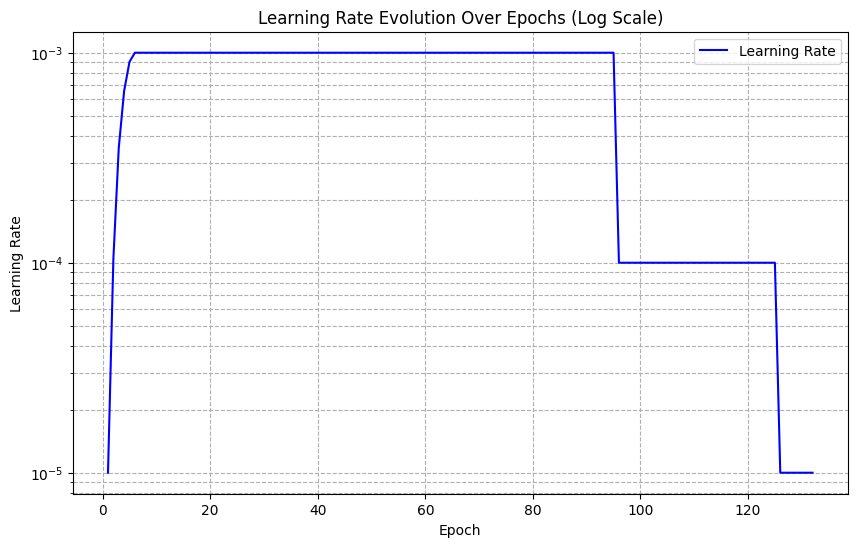

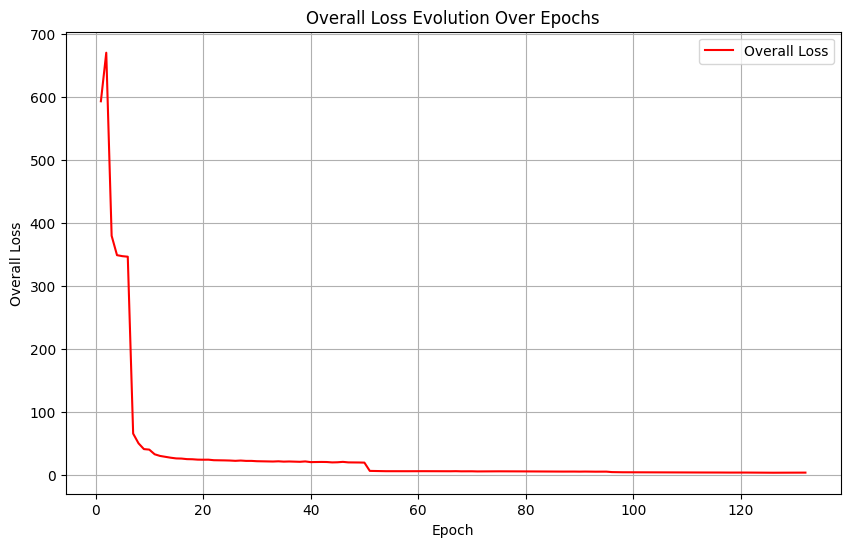

In [12]:
json_file = '/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS/logs/train.json'  # Update this to the actual path of your JSON log file

training_data = load_training_data(json_file)
lr_per_epoch, loss_per_epoch = extract_lr_and_loss_data(training_data)

# Plot Learning Rate Evolution
plot_lr_evolution(lr_per_epoch)

# Plot Overall Loss Evolution
plot_loss_evolution(loss_per_epoch)